<a href="https://colab.research.google.com/github/sayak-coding/Airbnb-NYC-Booking-Analysis-2019/blob/main/Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [ ]:
# import all essential libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 

In [ ]:
# Mount drive 

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Copy the csv file path and read by pandas library function read_csv

airbnb_nyc = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Capstone project/EDA Capstone Project/Airbnb NYC 2019.csv")

In [ ]:
# checking how our data frame is looking 

airbnb_nyc.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


In [ ]:
# Checking data type of every column and number of entries
 
airbnb_nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

#1. Null Values Operations

In [ ]:
# Checking how many null values are present and in which column 

airbnb_nyc.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
# Inplace of null values in 'name','host name', and 'last review' we put the word 'Not Found' and in 'reviews per month' we substiture the value = 0.0(float)

airbnb_nyc.name.fillna(value = 'Not Found', inplace = True)
airbnb_nyc.host_name.fillna(value = 'Not Found', inplace = True)
airbnb_nyc.last_review.fillna(value = 'Not Found', inplace = True)
airbnb_nyc.reviews_per_month.fillna(value = 0.0 , inplace = True)

In [ ]:
# Final check for null values

airbnb_nyc.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

#2. Neighbourhood Group

In [ ]:
# Checking how many unique neighbourhood group present in our data set 

airbnb_nyc.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [ ]:
print("There are",airbnb_nyc['neighbourhood_group'].nunique(),"distinct neighbourhood groups")

There are 5 distinct neighbourhood groups


In [ ]:
# Checking how many value present in each neighbourhood group

airbnb_nyc.neighbourhood_group.value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

Text(0.5, 1.0, 'Neighbourhood Groups')

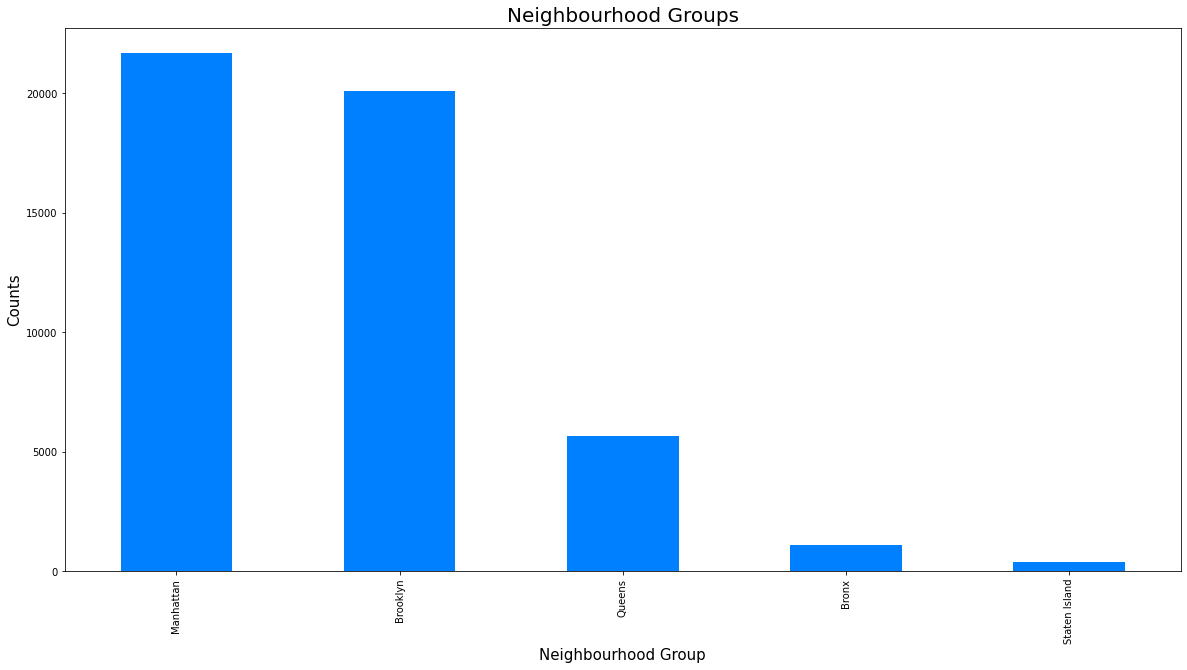

In [ ]:
# Showing distribution of every neighbourhood groups 

plt.figure(figsize= (20,10))
ax1 = airbnb_nyc['neighbourhood_group'].value_counts().sort_values(ascending = False).plot(kind = 'bar', color = '#007FFF')
ax1.set_xlabel('Neighbourhood Group',size = 15)
ax1.set_ylabel('Counts', size = 15)
plt.title('Neighbourhood Groups', size = 20)

#3. Room Type

In [ ]:
# Checking how many unique rooms present in our data set 

airbnb_nyc.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [ ]:
print("There are",airbnb_nyc['room_type'].nunique(),"distinct room type")

There are 3 distinct room type


In [ ]:
# Checking there are how many number of each rooms present 

airbnb_nyc.room_type.value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

Text(0.5, 1.0, 'Room Types')

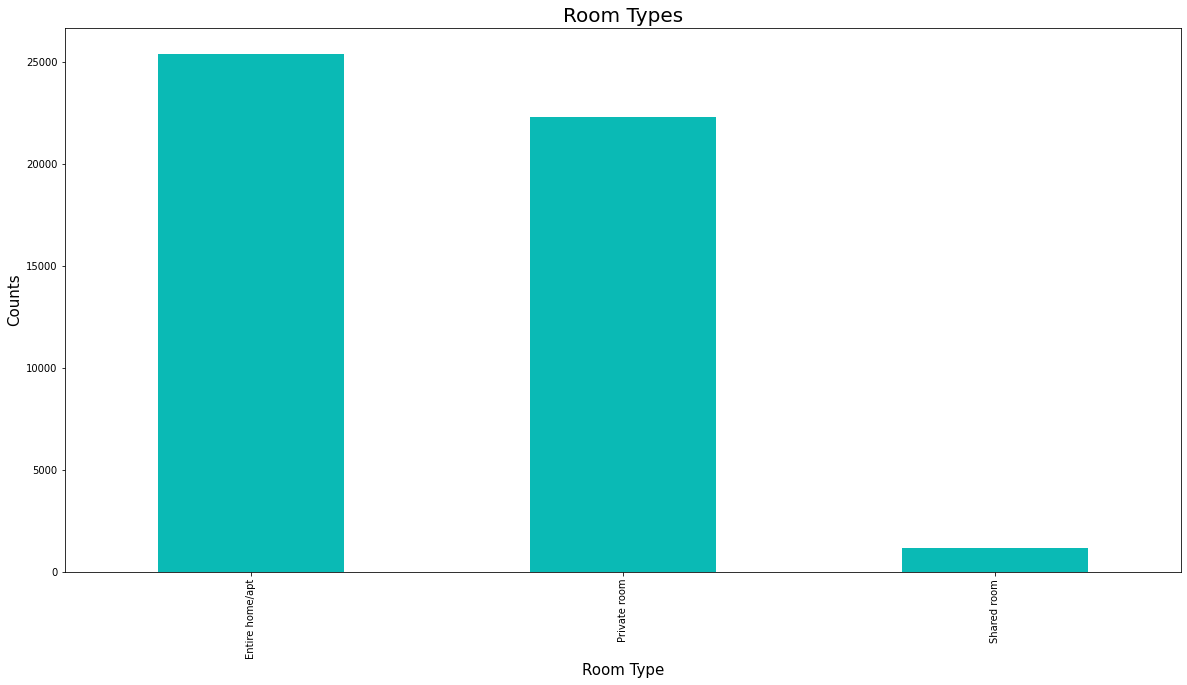

In [ ]:
# Showing distribution of every rooms 

plt.figure(figsize= (20,10))
ax1 = airbnb_nyc['room_type'].value_counts().sort_values(ascending = False).plot(kind = 'bar', color = '#0ABAB5')
ax1.set_xlabel('Room Type',size = 15)
ax1.set_ylabel('Counts', size = 15)
plt.title('Room Types', size = 20)

#4. Relation between Neighbourhood Group and Room Type

Text(0.5, 1.0, 'Relation between Neighbourhood Group and Room Type')

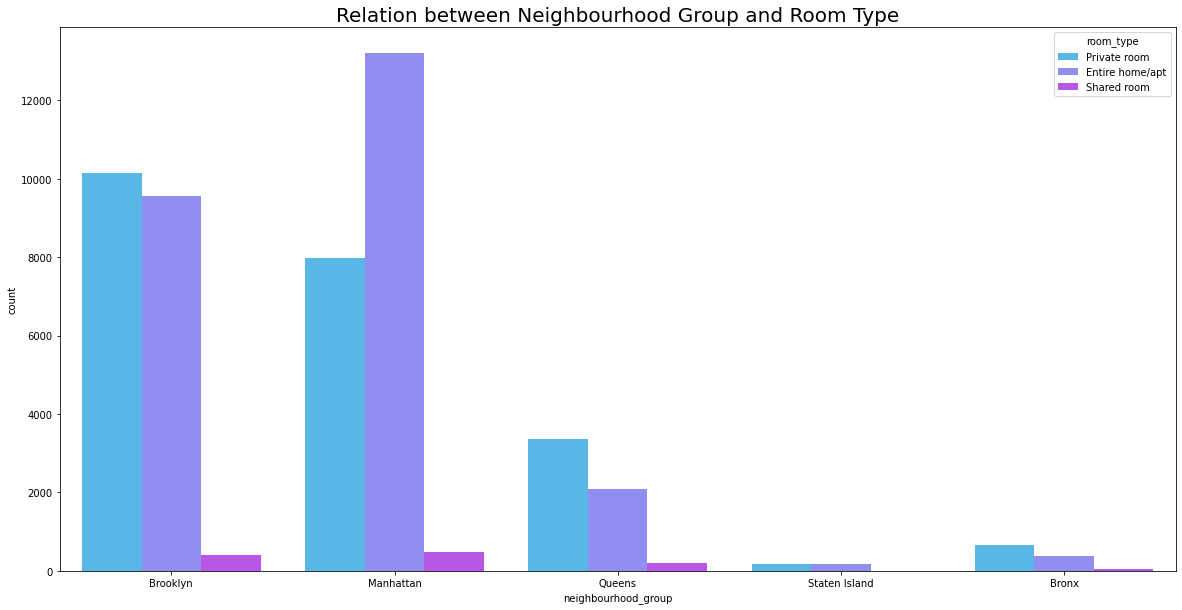

In [ ]:
# Showing distribution of every kind of rooms in each neighbourhood groups 

plt.figure(figsize= (20,10))
sns.countplot(x=airbnb_nyc['neighbourhood_group'],hue=airbnb_nyc['room_type'],palette='cool')
ax1.set_xlabel("Neighbourhood Group", size = 15)
ax1.set_ylabel("counts",size = 15)
plt.title("Relation between Neighbourhood Group and Room Type",size = 20)

#5. Top Host

In [ ]:
# Checking top hosts of our data set 

top_host = airbnb_nyc.host_id.value_counts().head(5)
top_host

219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
Name: host_id, dtype: int64

In [ ]:
# Creating a data frame of host id and their listing counts

top_host_df = pd.DataFrame(top_host)
top_host_df.reset_index(inplace = True)
top_host_df.rename(columns = {'index':'Host_ID','host_id':'Count'},inplace = True)
top_host_df

,Host_ID,Count
0,219517861,327
1,107434423,232
2,30283594,121
3,137358866,103
4,16098958,96


Text(0.5, 1.0, 'Host with the most listings in NYC')

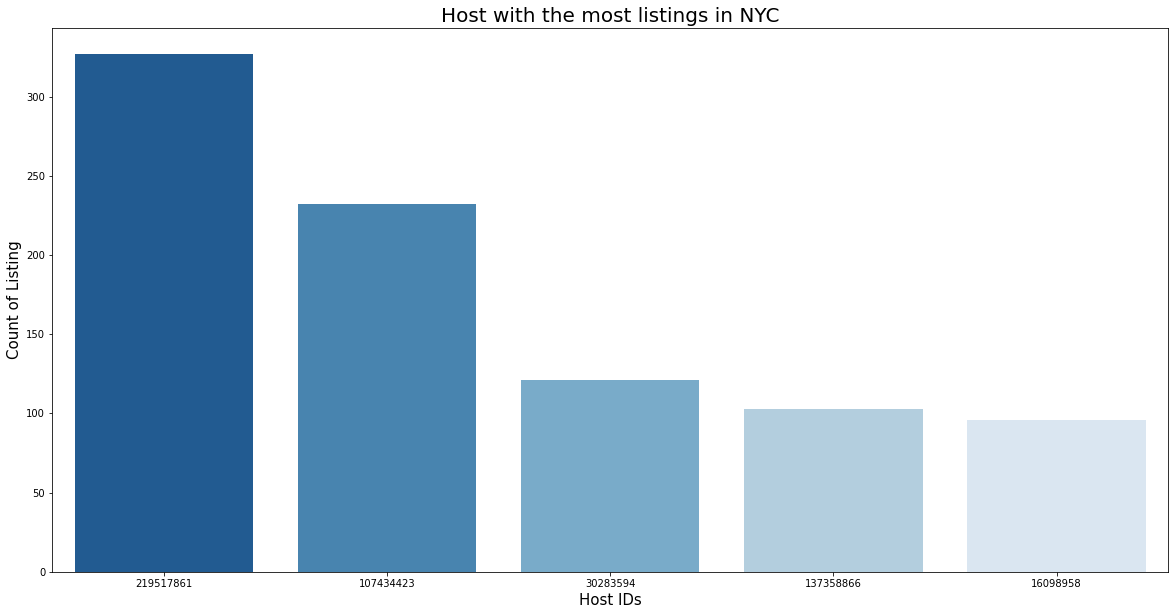

In [ ]:
# Distribution of top 5 hosts with most listing

plt.figure(figsize = (20,10))
host_graph = sns.barplot(x='Host_ID',y='Count',data=top_host_df,order=top_host_df.sort_values('Count',ascending = False).Host_ID,palette = 'Blues_r') 
host_graph.set_xlabel('Host IDs',size = 15)
host_graph.set_ylabel('Count of Listing',size = 15)
host_graph.set_title('Host with the most listings in NYC', size = 20)


#6. Price Distribution

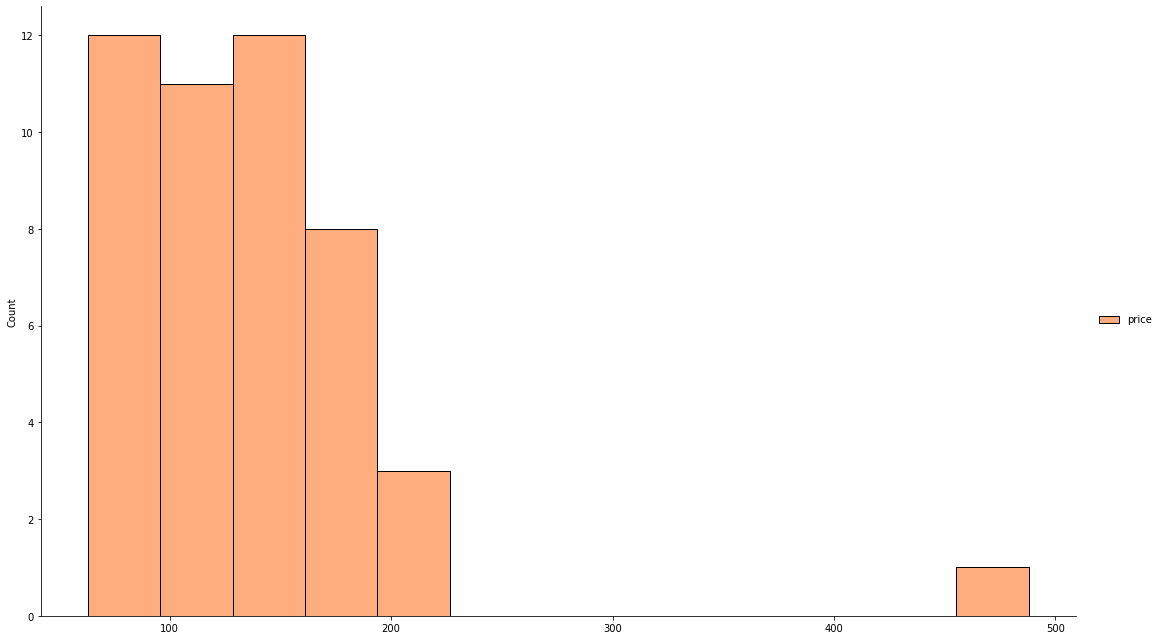

In [ ]:
# Here we check room price distribution of every neighbourhood groups

# Room Price distribution for Brooklyn 

Brooklyn_ = airbnb_nyc.loc[airbnb_nyc['neighbourhood_group']=='Brooklyn']
price_Brooklyn_ = Brooklyn_['price']
Brooklyn_1 = airbnb_nyc[airbnb_nyc.neighbourhood_group == 'Brooklyn'][['neighbourhood','price']]
plot = Brooklyn_1.groupby("neighbourhood").mean()
sns.displot(plot,height = 9, aspect = 1.7 ,palette ='hot')
plt.show()

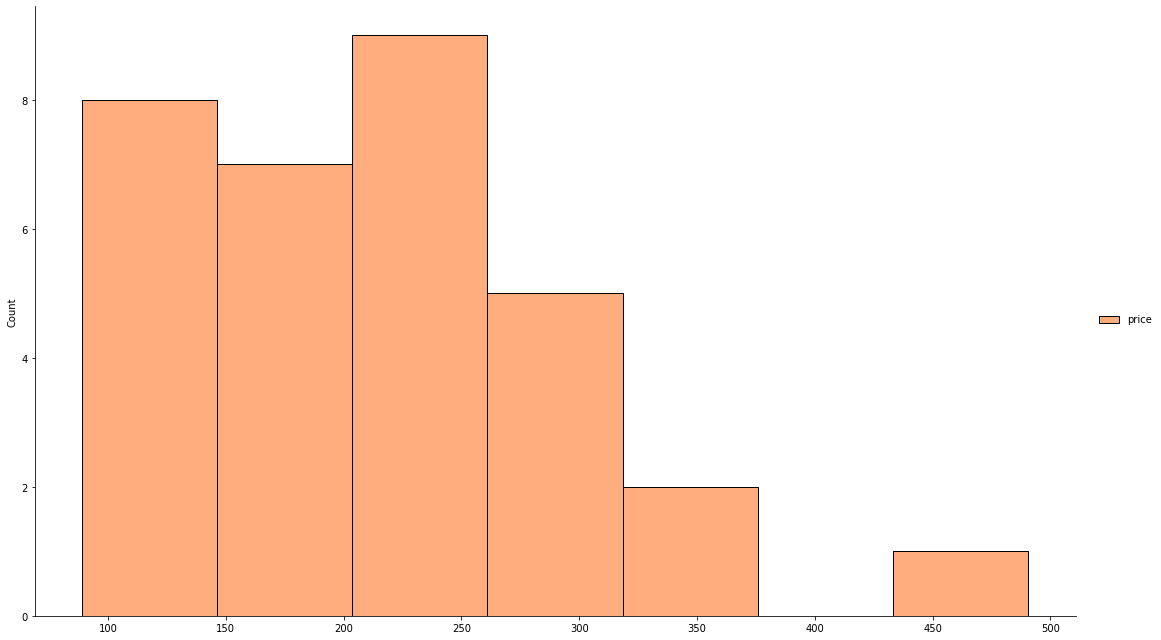

In [ ]:
# Room Price distribution for Manhattan

Manhattan_ = airbnb_nyc.loc[airbnb_nyc['neighbourhood_group']=='Manhattan']
price_Manhattan_ = Manhattan_['price']
Manhattan_1 = airbnb_nyc[airbnb_nyc.neighbourhood_group == 'Manhattan'][['neighbourhood','price']]
plot = Manhattan_1.groupby("neighbourhood").mean()
sns.displot(plot,height = 9, aspect = 1.7 ,palette ='hot')
plt.show()

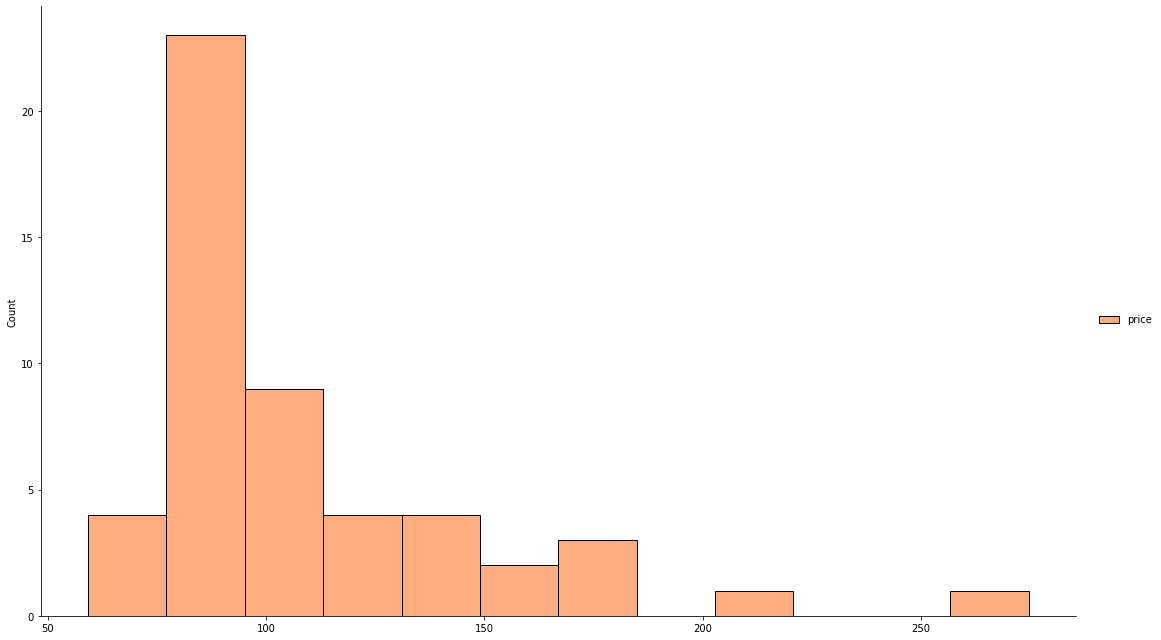

In [ ]:
# Room Price distribution for Queens

Queens_ = airbnb_nyc.loc[airbnb_nyc['neighbourhood_group']=='Queens']
price_Queens_ = Queens_['price']
Queens_1 = airbnb_nyc[airbnb_nyc.neighbourhood_group == 'Queens'][['neighbourhood','price']]
plot = Queens_1.groupby("neighbourhood").mean()
sns.displot(plot,height = 9, aspect = 1.7 ,palette ='hot')
plt.show()

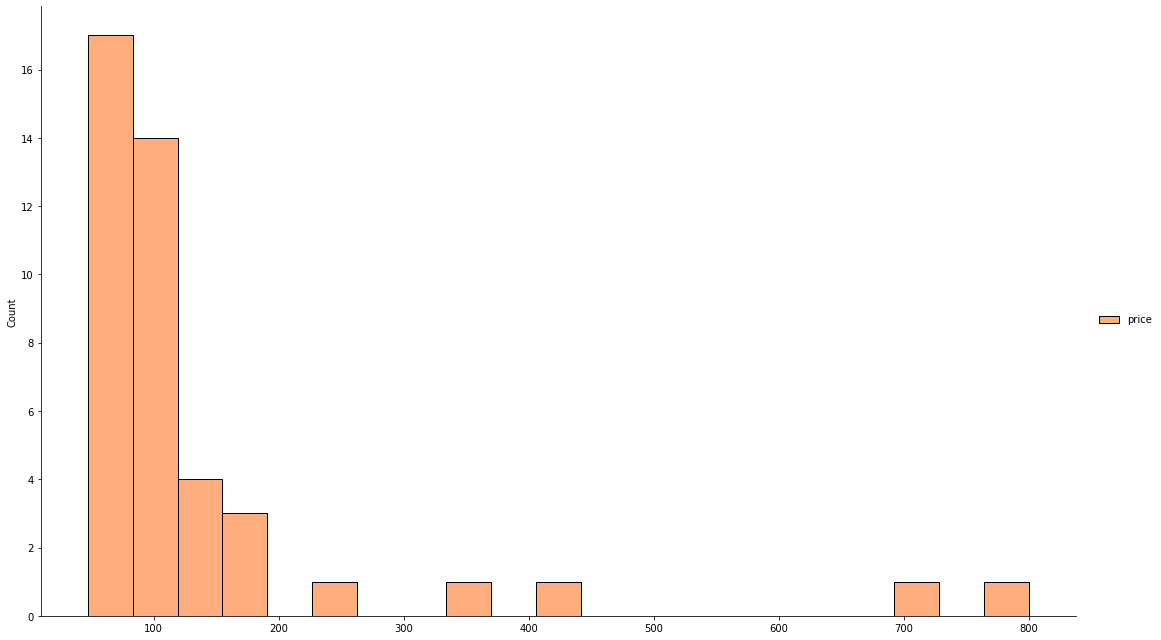

In [ ]:
# Room Price distribution of Staten Island

Staten_Island_ = airbnb_nyc.loc[airbnb_nyc['neighbourhood_group']=='Staten Island']
price_Staten_Island_ = Staten_Island_['price']
Staten_Island_1 = airbnb_nyc[airbnb_nyc.neighbourhood_group == 'Staten Island'][['neighbourhood','price']]
plot = Staten_Island_1.groupby("neighbourhood").mean()
sns.displot(plot,height = 9, aspect = 1.7 ,palette ='hot')
plt.show()

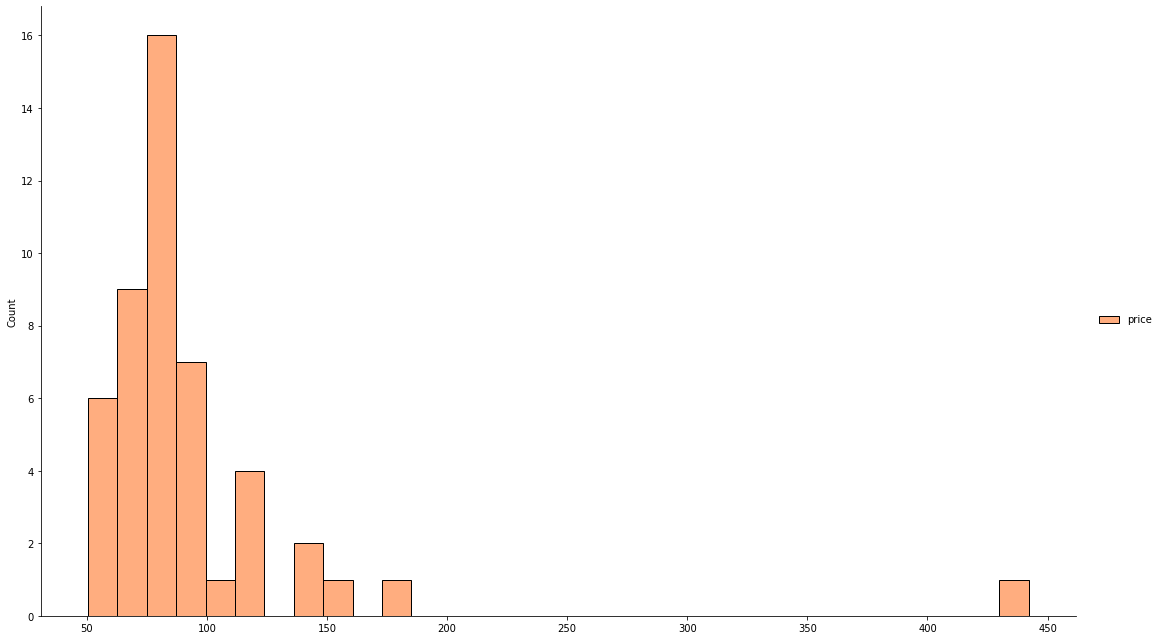

In [ ]:
# Room Price distribution of Bronx

Bronx_ = airbnb_nyc.loc[airbnb_nyc['neighbourhood_group']=='Bronx']
price_Bronx_ = Bronx_['price']
Bronx_1 = airbnb_nyc[airbnb_nyc.neighbourhood_group == 'Bronx'][['neighbourhood','price']]
plot = Bronx_1.groupby("neighbourhood").mean()
sns.displot(plot,height = 9, aspect = 1.7 ,palette ='hot')
plt.show()

In [ ]:
# Creating a list of price by all neighbourhood group

price_list_by_nbd = [Brooklyn_1,Manhattan_1,Queens_1,Staten_Island_1,Bronx_1]

In [ ]:
# creating an empty list for append the price distributions for each neighbourhood group

price_dist_nbd_group = []

# creating list with known values in neighbourhood group coloumn

nbd_list = ['Brooklyn','Manhattan','Queens','Staten Island','Bronx']

# Creating a for loop to get statistics for ranges and append it to our empty list 

for x in price_list_by_nbd:
  i = x.describe(percentiles = [.25,.50,.75])
  i = i.iloc[3:]
  i.reset_index(inplace = True)
  i.rename(columns = {'index':'Stats'}, inplace = True)
  price_dist_nbd_group.append(i)

# changing names of the price column to the area name for easier reading of the table 

price_dist_nbd_group[0].rename(columns = {'price':nbd_list[0]}, inplace = True)
price_dist_nbd_group[1].rename(columns = {'price':nbd_list[1]}, inplace = True)
price_dist_nbd_group[2].rename(columns = {'price':nbd_list[2]}, inplace = True)
price_dist_nbd_group[3].rename(columns = {'price':nbd_list[3]}, inplace = True)
price_dist_nbd_group[4].rename(columns = {'price':nbd_list[4]}, inplace = True)

# Finalizing our data frame for final view

stat_table = price_dist_nbd_group
stat_table = [df.set_index('Stats') for df in stat_table]
stat_table = stat_table[0].join(stat_table[1:])
stat_table

,Brooklyn,Manhattan,Queens,Staten Island,Bronx
Stats,,,,,
min,0.0,0.0,10.0,13.0,0.0
25%,60.0,95.0,50.0,50.0,45.0
50%,90.0,150.0,75.0,75.0,65.0
75%,150.0,220.0,110.0,110.0,99.0
max,10000.0,10000.0,10000.0,5000.0,2500.0


Text(0.5, 1.0, 'Density and distribution of prices for each neighbourhood group')

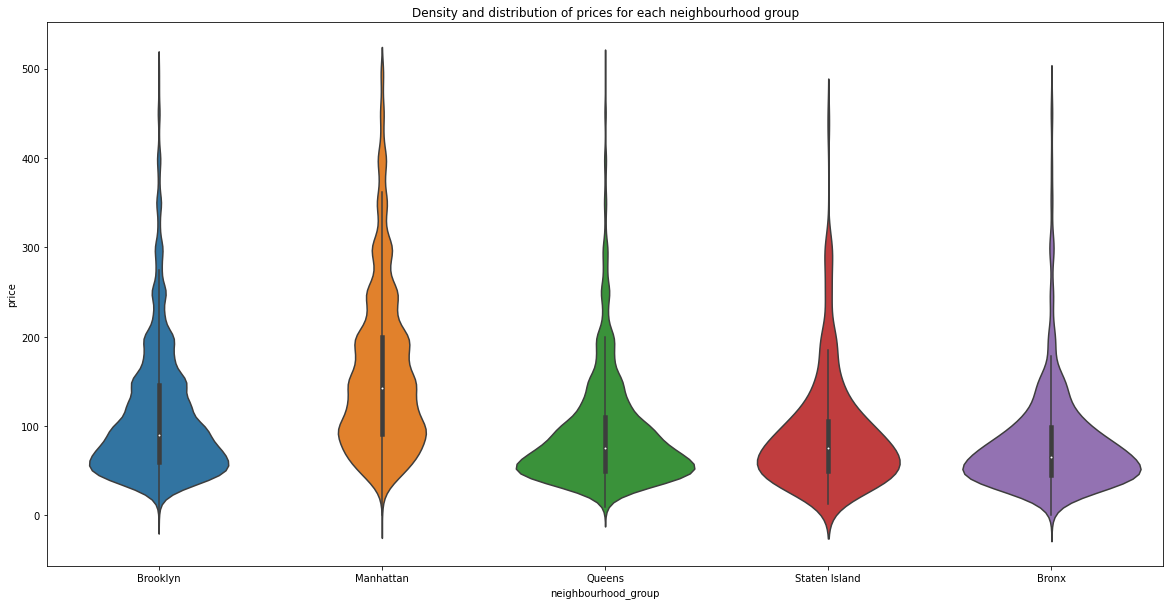

In [ ]:
# we can see from our statistical table that we have some extreme values ,therefore we need to remove them for the sake of a better visualization 
# creating a sub data frame with no extreme values(less than 500)

price_dist_nbd_group_plot = airbnb_nyc[airbnb_nyc.price<500]

# using violinplot to showcase density and distribution of prices 

fig, ax = plt.subplots(figsize=(20, 10))
p_d_n_g_plot = sns.violinplot(data = price_dist_nbd_group_plot, x='neighbourhood_group', y= 'price' , ax=ax)
p_d_n_g_plot.set_title('Density and distribution of prices for each neighbourhood group')

# 7. Average price of Neighbourhood Groups

Text(0.5, 1.0, 'Average Price of Neighbourhood Groups')

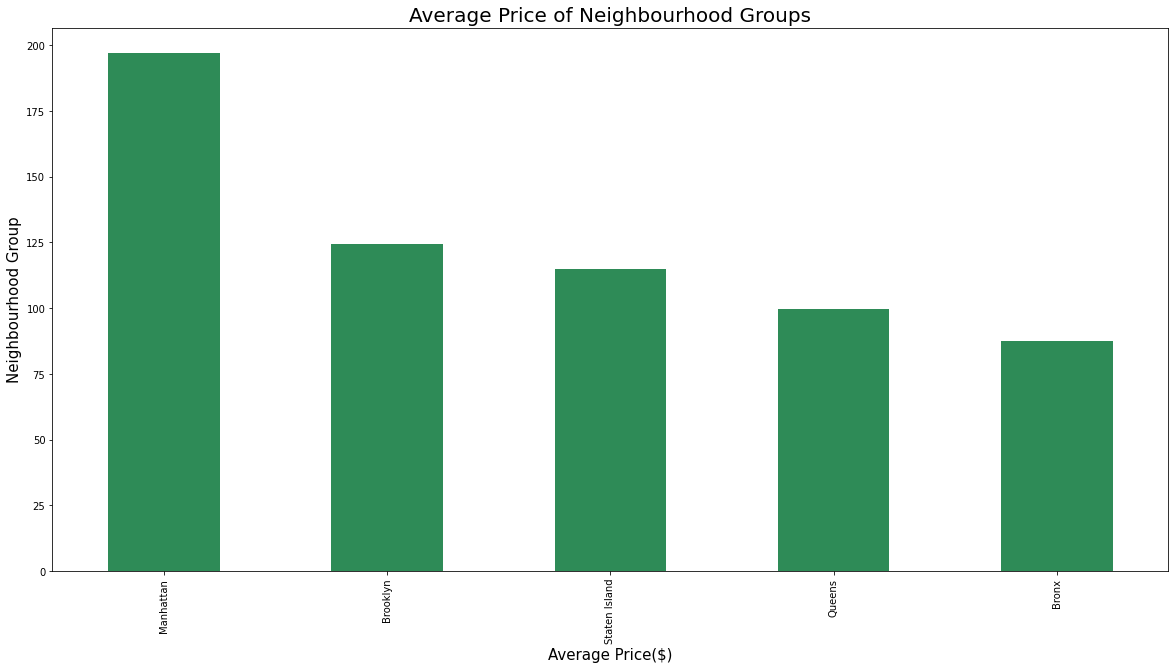

In [ ]:
# Showing the distribution of average prices of every neighbourhood groups

plt.figure(figsize = (20,10))
airbnb_nyc.groupby("neighbourhood_group")["price"].agg("mean").sort_values(ascending = False).plot(kind='bar',color='seagreen')
plt.xlabel('Average Price($)', size = 15)
plt.ylabel("Neighbourhood Group", size = 15)
plt.title("Average Price of Neighbourhood Groups", size=20)

# 8. Neighbourhood

There are 221 values


Text(0.5, 1.0, 'Top 10 Neighbourhood')

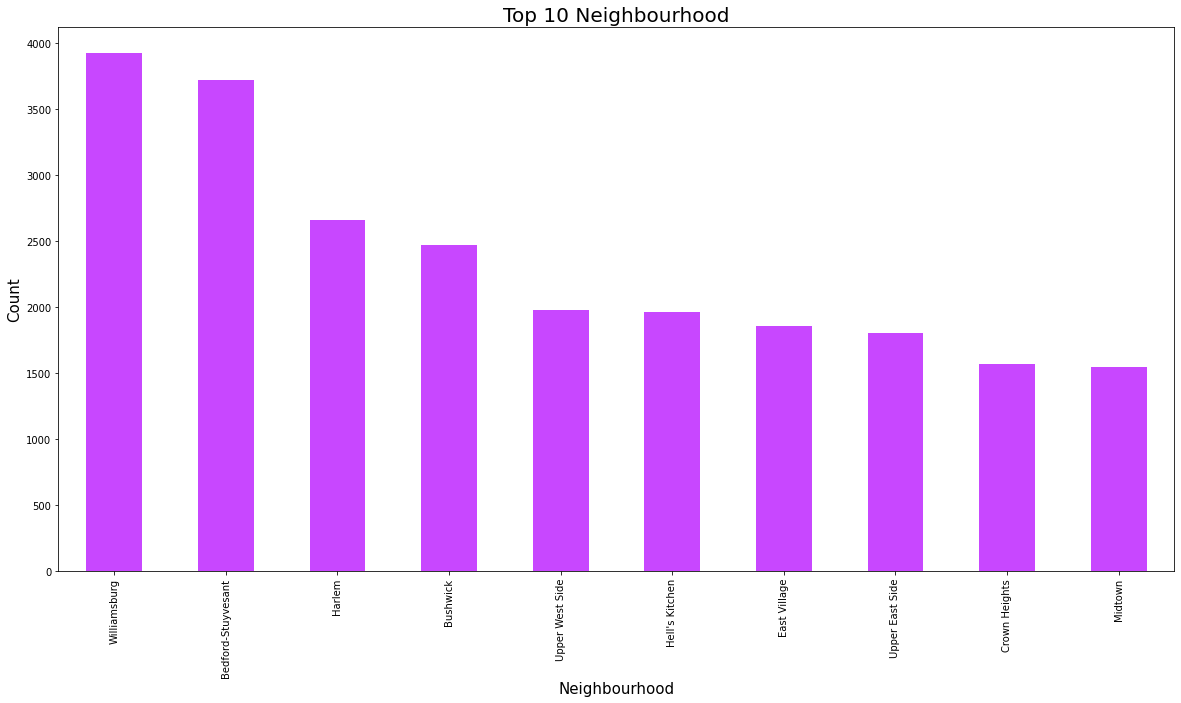

In [ ]:
# Showing the distribution of top 10 neighbourhood

print("There are", airbnb_nyc['neighbourhood'].nunique(),'values')
plt.figure(figsize = (20,10))
airbnb_nyc["neighbourhood"].value_counts().head(10).sort_values(ascending = False).plot(kind='bar',color='#c847ff')
plt.xlabel('Neighbourhood', size = 15)
plt.ylabel("Count", size = 15)
plt.title("Top 10 Neighbourhood", size=20)

# 9. Top 10 neighbourhood with highest average price

Text(0.5, 1.0, 'Top 10 Neighbourhood with highest average price ')

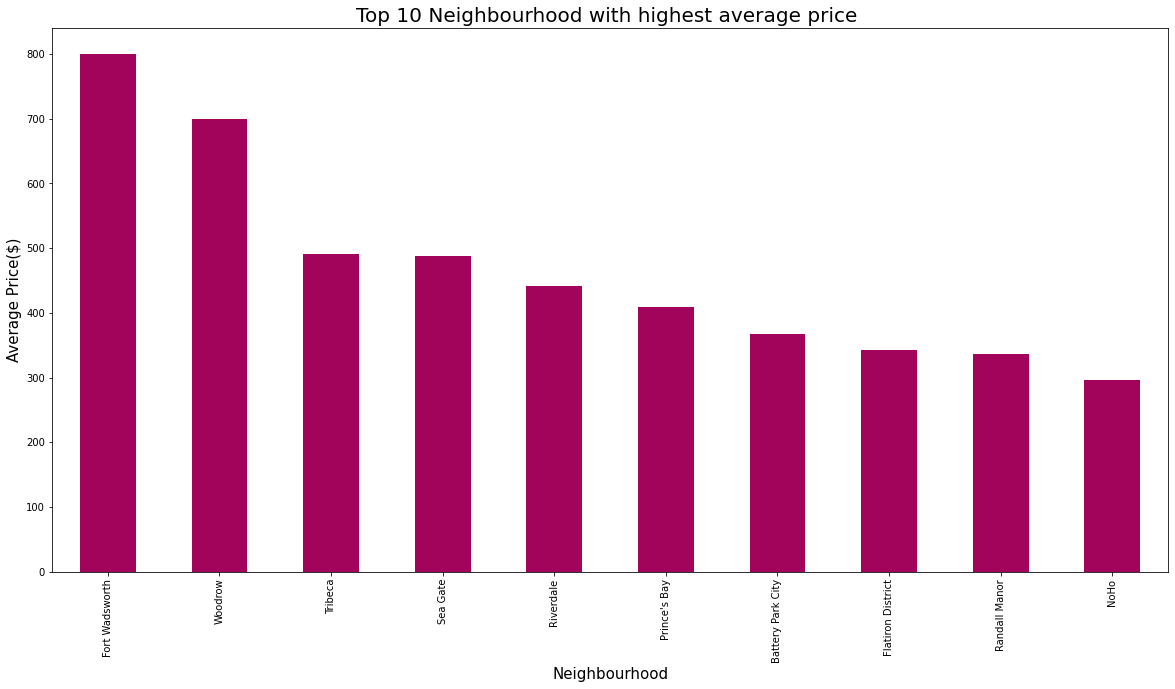

In [ ]:
# Showing the distribution of average prices of every neighbourhood 

plt.figure(figsize = (20,10))
airbnb_nyc.groupby("neighbourhood")["price"].agg("mean").sort_values(ascending = False).head(10).plot(kind = 'bar', color='#a1045a')
plt.xlabel('Neighbourhood', size = 15)
plt.ylabel("Average Price($)", size = 15)
plt.title("Top 10 Neighbourhood with highest average price ", size=20)

# 10. Average cost for each Room Type

Text(0.5, 1.0, 'Room type with Average Prices ')

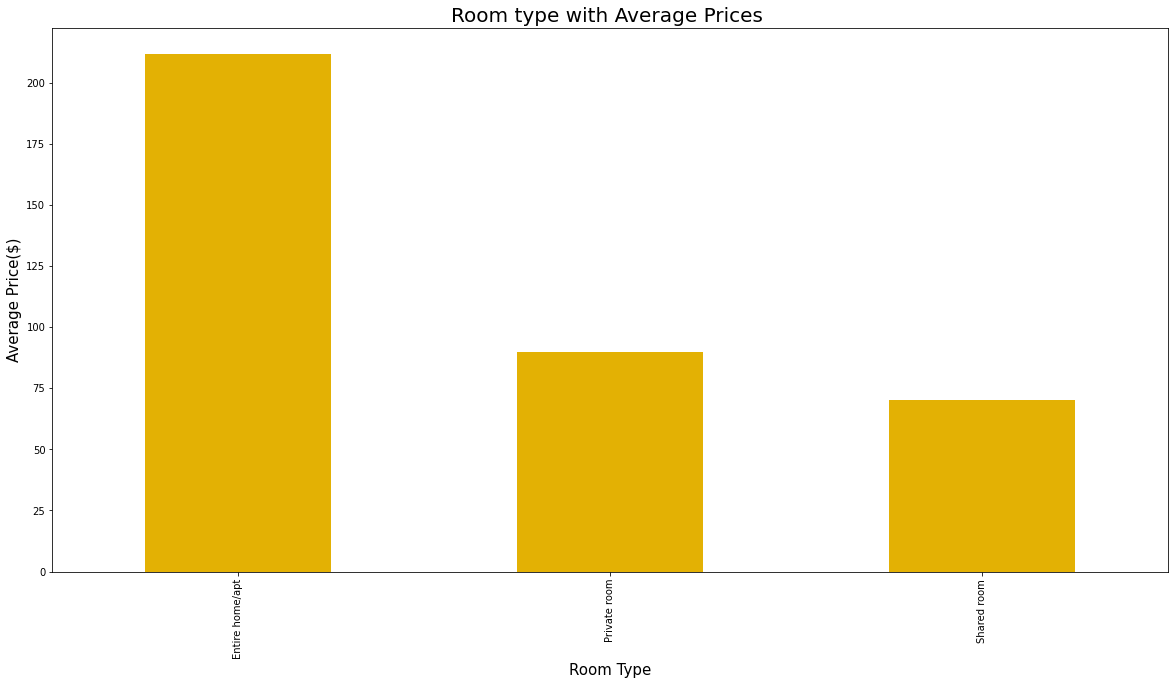

In [ ]:
# Showing the distribution of average prices of each types of rooms

plt.figure(figsize = (20,10))
airbnb_nyc.groupby("room_type")["price"].agg("mean").sort_values(ascending = False).head(10).plot(kind = 'bar', color='#e3b104')
plt.xlabel('Room Type', size = 15)
plt.ylabel("Average Price($)", size = 15)
plt.title("Room type with Average Prices ", size=20)

# 11. Relation between Neighbourhood and Room Type

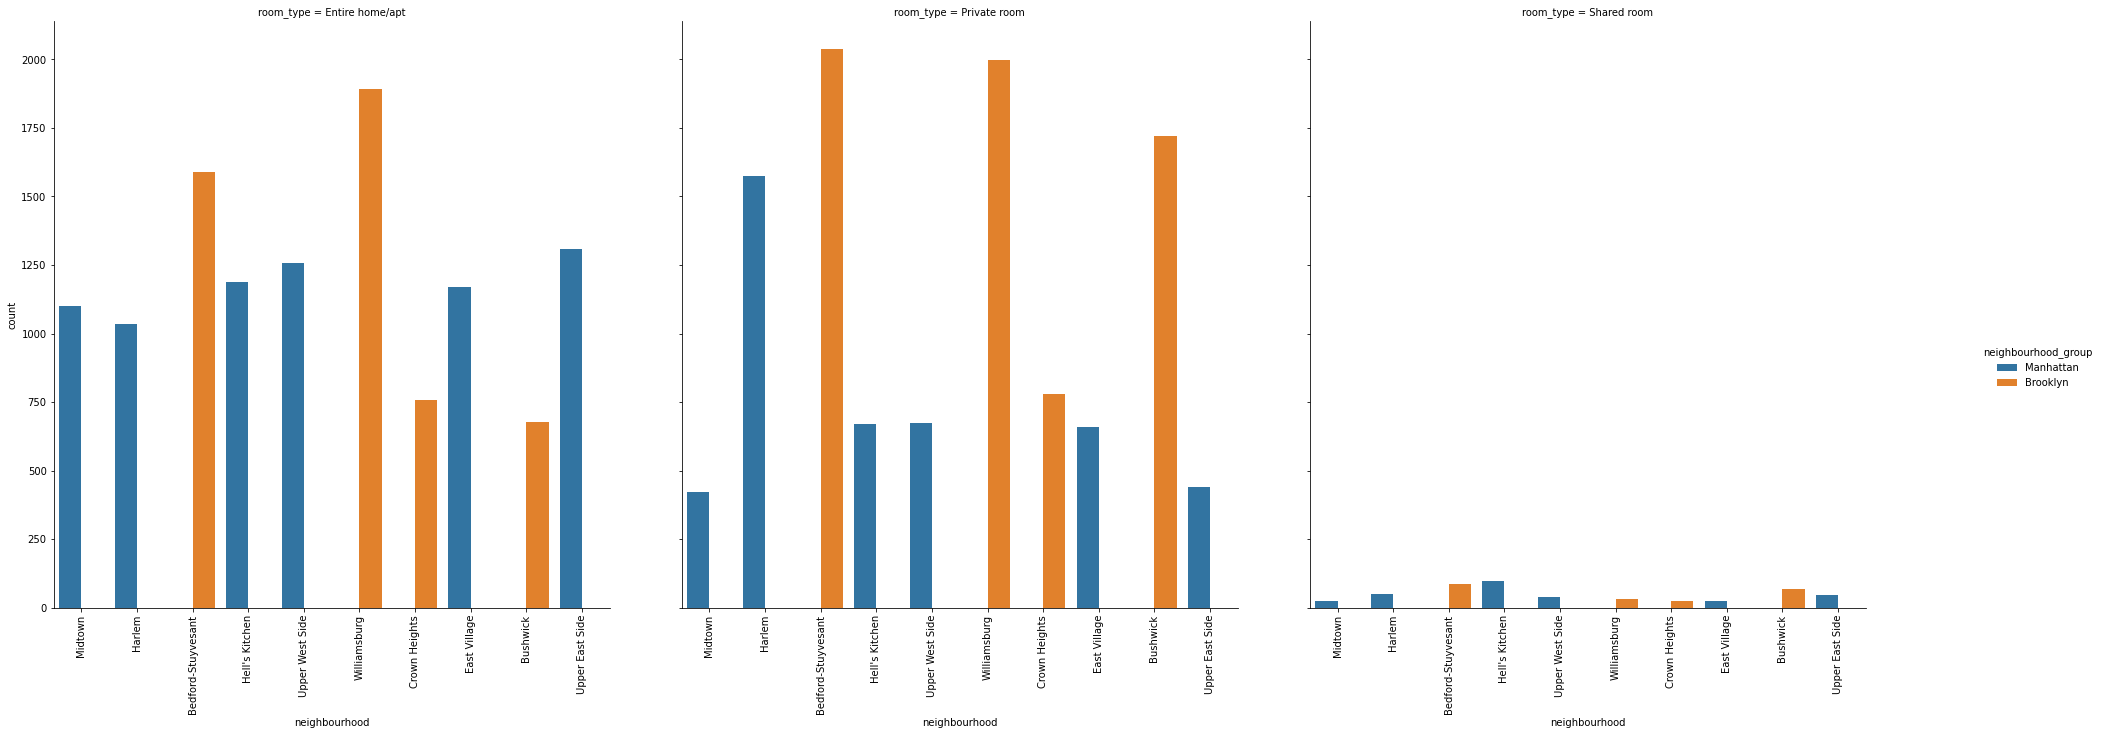

In [ ]:
# Showing distribution of room type in each neighbourhood

# airbnb_nyc.neighbourhood.value_counts().head(10)
nbd_room_type =airbnb_nyc.loc[airbnb_nyc['neighbourhood'].isin(['Williamsburg','Bedford-Stuyvesant','Harlem','Bushwick','Upper West Side','Hell\'s Kitchen','East Village','Upper East Side','Crown Heights','Midtown'])]
graph=sns.catplot(x='neighbourhood', hue='neighbourhood_group', col='room_type', data=nbd_room_type, kind='count')
graph.set_xticklabels(rotation=90)
graph.fig.set_figwidth(30)
graph.fig.set_figheight(10)

#12. Number of Reviews

In [ ]:
#Check for top 10 reviews
 
top_review = airbnb_nyc.nlargest(10,'number_of_reviews')
top_review

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
11759,9145202,Room near JFK Queen Bed,47621202,Dona,Queens,Jamaica,40.66730,-73.76831,Private room,47,1,629,2019-07-05,14.58,2,333
2031,903972,Great Bedroom in Manhattan,4734398,Jj,Manhattan,Harlem,40.82085,-73.94025,Private room,49,1,607,2019-06-21,7.75,3,293
2030,903947,Beautiful Bedroom in Manhattan,4734398,Jj,Manhattan,Harlem,40.82124,-73.93838,Private room,49,1,597,2019-06-23,7.72,3,342
2015,891117,Private Bedroom in Manhattan,4734398,Jj,Manhattan,Harlem,40.82264,-73.94041,Private room,49,1,594,2019-06-15,7.57,3,339
13495,10101135,Room Near JFK Twin Beds,47621202,Dona,Queens,Jamaica,40.66939,-73.76975,Private room,47,1,576,2019-06-27,13.40,2,173
10623,8168619,Steps away from Laguardia airport,37312959,Maya,Queens,East Elmhurst,40.77006,-73.87683,Private room,46,1,543,2019-07-01,11.59,5,163
1879,834190,Manhattan Lux Loft.Like.Love.Lots.Look !,2369681,Carol,Manhattan,Lower East Side,40.71921,-73.99116,Private room,99,2,540,2019-07-06,6.95,1,179
20403,16276632,Cozy Room Family Home LGA Airport NO CLEANING FEE,26432133,Danielle,Queens,East Elmhurst,40.76335,-73.87007,Private room,48,1,510,2019-07-06,16.22,5,341
4870,3474320,Private brownstone studio Brooklyn,12949460,Asa,Brooklyn,Park Slope,40.67926,-73.97711,Entire home/apt,160,1,488,2019-07-01,8.14,1,269
471,166172,LG Private Room/Family Friendly,792159,Wanda,Brooklyn,Bushwick,40.70283,-73.92131,Private room,60,3,480,2019-07-07,6.70,1,0


In [ ]:
airbnb_nyc.last_review.min()

'2011-03-28'

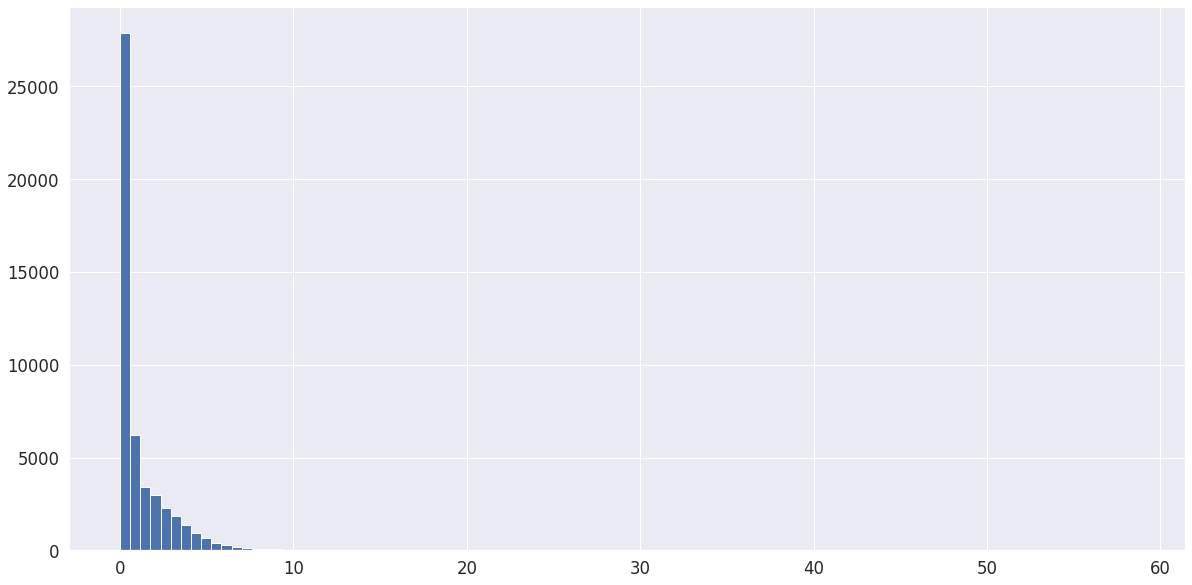

In [ ]:
#Distribution of reviews per night

sns.set(font_scale=1.5)
plt.figure(figsize=(20,10))
airbnb_nyc.reviews_per_month.hist(bins = 100)

#13. Average Price per Night

In [ ]:
# Average price per night 

average_price = top_review.price.mean()
print('Average price per night:{}'.format(average_price))

Average price per night:65.4


#14. Availability of Rooms and Minimum Nights

In [ ]:
airbnb_nyc.availability_365.value_counts().sort_values(ascending = True)



202       20
181       23
183       24
196       24
195       26
       ...  
89       361
1        408
364      491
365     1295
0      17533
Name: availability_365, Length: 366, dtype: int64

In [ ]:
airbnb_nyc.minimum_nights.value_counts().sort_values(ascending = True)

36         1
98         1
222        1
275        1
182        1
       ...  
4       3303
30      3760
3       7999
2      11696
1      12720
Name: minimum_nights, Length: 109, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


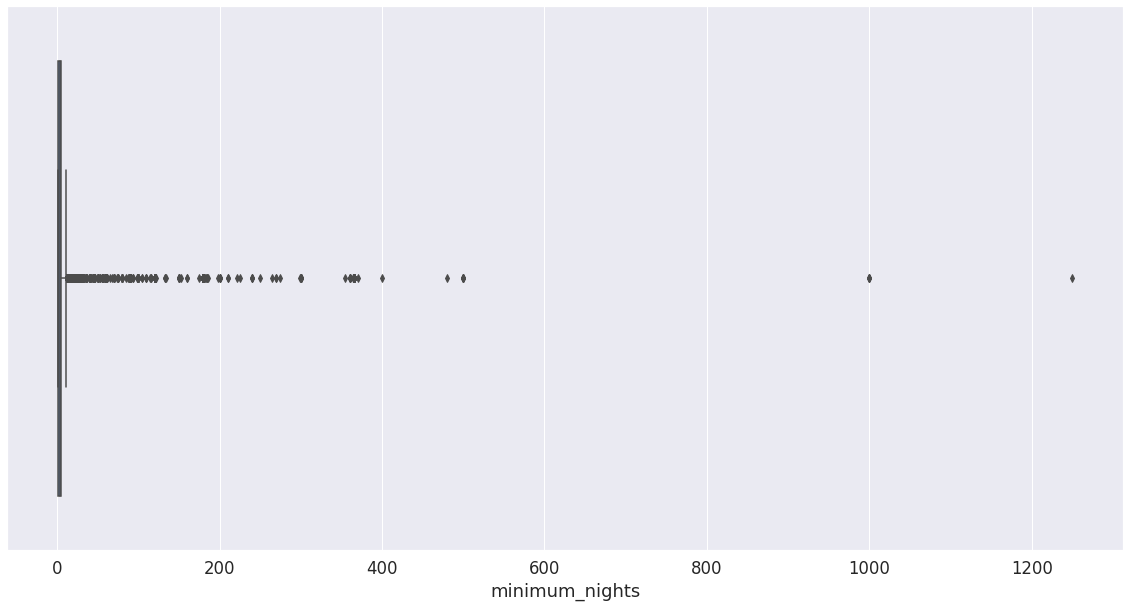

In [ ]:
# Showing the graph of how many no of days of minimum nights spent

plt.figure(figsize = (20,10))
sns.boxplot(airbnb_nyc['minimum_nights'])

In [ ]:
#check how many listings have minimum nights set to more than a year

airbnb_nyc.loc[airbnb_nyc['minimum_nights']>365]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
1305,568684,800sqft apartment with huge terrace,2798644,Alessandra,Brooklyn,Bushwick,40.70202,-73.92402,Entire home/apt,115,370,6,2018-04-15,0.09,1,365
2854,1615764,Not Found,6676776,Peter,Manhattan,Battery Park City,40.71239,-74.01620,Entire home/apt,400,1000,0,Not Found,0.00,1,362
5767,4204302,Prime W. Village location 1 bdrm,17550546,Genevieve,Manhattan,Greenwich Village,40.73293,-73.99782,Entire home/apt,180,1250,2,2014-11-09,0.03,1,365
7355,5431845,Beautiful Fully Furnished 1 bed/bth,3680008,Aliya,Queens,Long Island City,40.75104,-73.93863,Entire home/apt,134,500,30,2018-06-24,0.57,1,90
8014,6169897,Wonderful Large 1 bedroom,10720264,John,Manhattan,Harlem,40.82135,-73.95521,Entire home/apt,75,500,0,Not Found,0.00,1,362
10829,8341919,Brand New Luxury Apt Lease Takeover,43945071,Shining,Queens,Long Island City,40.74654,-73.95778,Entire home/apt,199,480,0,Not Found,0.00,1,365
11193,8668115,Zen Room in Crown Heights Brooklyn,8996336,Laura,Brooklyn,Crown Heights,40.67255,-73.94914,Private room,50,500,10,2016-09-22,0.22,1,365
13404,10053943,Historic Designer 2 Bed. Apartment,2697686,Glenn H.,Manhattan,Harlem,40.82915,-73.94034,Entire home/apt,99,999,2,2018-01-04,0.07,1,42
14285,11096888,Peaceful apartment close to F/G,2228137,Amanda,Brooklyn,Kensington,40.64779,-73.97956,Private room,45,500,0,Not Found,0.00,1,358
15946,12888849,"Bright Luxury Studio, Central Loc.",16476167,Sarah,Manhattan,Midtown,40.74513,-73.98475,Entire home/apt,250,366,0,Not Found,0.00,1,365


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


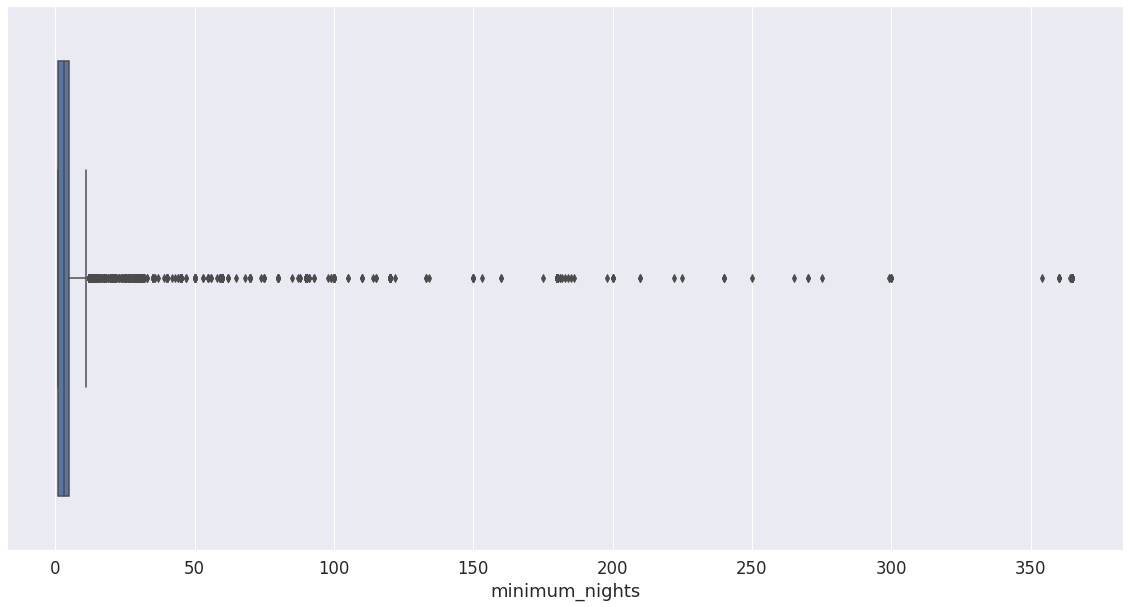

In [ ]:
#we will only cosider listings that have minimum nights, set to a year or less

airbnb_nyc = airbnb_nyc.loc[airbnb_nyc['minimum_nights']<=365]

#reseting the count for listings as a few rows were removed

airbnb_nyc['host_listing_count'] = airbnb_nyc.groupby('host_id')['host_id'].transform('count')
airbnb_nyc.reset_index(inplace = True)
plt.figure(figsize = (20,10))
sns.boxplot(airbnb_nyc['minimum_nights'])

In [ ]:
airbnb_nyc.minimum_nights.value_counts().sort_values(ascending = False).head(10)

1     12720
2     11696
3      7999
30     3760
4      3303
5      3034
7      2058
6       752
14      562
10      483
Name: minimum_nights, dtype: int64

In [ ]:
#create a new column for categorizing the minimum nights

min_night_type= []
for i in range (len(airbnb_nyc)):
  if airbnb_nyc.minimum_nights[i]<=6:
    min_night_type.append('1 - 6 days')
  elif airbnb_nyc.minimum_nights[i] == 7:
    min_night_type.append('1 week')
  elif airbnb_nyc.minimum_nights[i] <=14:
    min_night_type.append('2 week')
  elif airbnb_nyc.minimum_nights[i]<=90:
    min_night_type.append('1 - 3 months')
  elif airbnb_nyc.minimum_nights[i]<=180:
    min_night_type.append('4 - 6 months')
  else :
    min_night_type.append('7 months - 1 year')

#add this column to the data frame 

airbnb_nyc['min_night_type'] = min_night_type
airbnb_nyc.head(10)

,index,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,host_listing_count,min_night_type
0,0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,6,1 - 6 days
1,1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,2,1 - 6 days
2,2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,Not Found,0.00,1,365,1,1 - 6 days
3,3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,1,1 - 6 days
4,4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,1,2 week
5,5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129,1,1 - 6 days
6,6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0,1,1 - 3 months
7,7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220,1,1 - 6 days
8,8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0,1,1 - 6 days
9,9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188,4,1 - 6 days


#15. Distribution of Neighbourhood group with respect to latitude and longitude

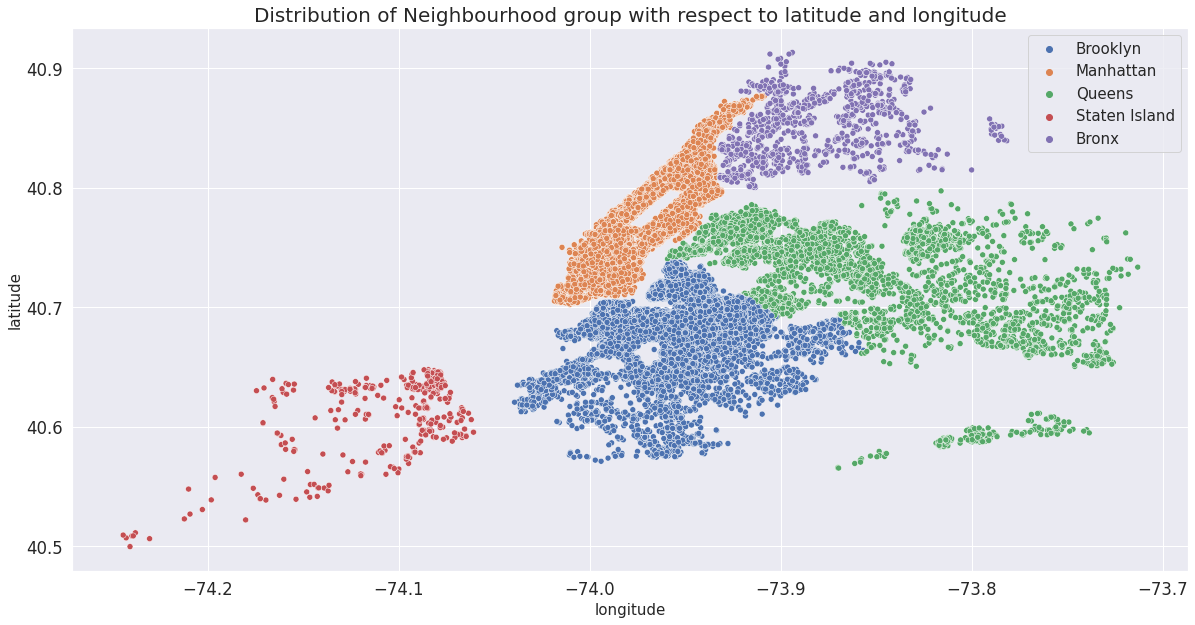

In [ ]:
# Showing the distribution of each neighbourhood groups with respect to coordinate

plt.figure(figsize = (20,10))
sns.scatterplot(data = airbnb_nyc,x = 'longitude',y = 'latitude', hue = 'neighbourhood_group')
plt.xlabel('longitude',fontsize = 15)
plt.ylabel('latitude',fontsize = 15)
plt.title("Distribution of Neighbourhood group with respect to latitude and longitude", fontsize = 20)
plt.legend(prop={"size":15})

#16. Distribution of Room type with respect to latitude and longitude

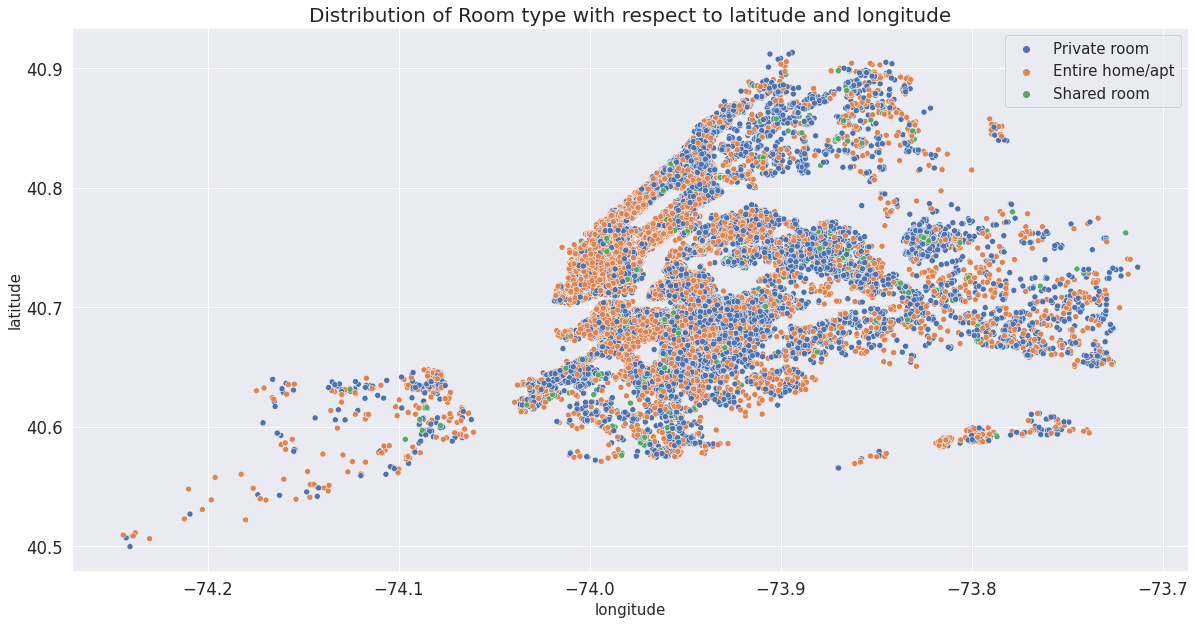

In [ ]:
# Showing the distribution of each room type with respect to coordinate

plt.figure(figsize = (20,10))
sns.scatterplot(data = airbnb_nyc,x = 'longitude',y = 'latitude', hue = 'room_type')
plt.xlabel('longitude',fontsize = 15)
plt.ylabel('latitude',fontsize = 15)
plt.title("Distribution of Room type with respect to latitude and longitude", fontsize = 20)
plt.legend(prop={"size":15})